In [145]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
import os
import pints
import pandas as pd
from experimental_data_processing import processingExperimentalData
from Newton_model_numba import wrappedNewton, newtonRaphsonFT

In [146]:
 # reading in experimental data
input_data_file = os.path.join('Data', 'processed')
input_data_file = os.path.join(input_data_file, '220415')
input_data_file = os.path.join(input_data_file, 'ph4 2m nacl 25oC')
input_data_file = os.path.join(input_data_file, 'ac')
input_data_file = os.path.join(input_data_file, '9_1b_cv_current')
#input_data_file = os.path.join(input_data_file, '9_1b_cv_current')
# file for outut
output_data_file = os.path.join('Data', 'processed')
output_data_file = os.path.join(output_data_file, '220415')
output_data_file = os.path.join(output_data_file, 'ph4 2m nacl 25oC')
output_data_file = os.path.join(output_data_file, 'ac')
output_data_file = os.path.join(output_data_file, '9_1b_cv_current_reduced.txt')
#output_data_file = os.path.join(output_data_file, '9_1b_cv_current_reduced.txt')

# frequency of experimental data
freq = 8.977950e+00

In [147]:
# creating instance of dataprocessing class
data_processing = processingExperimentalData(input_data_file, output_data_file)

# caculating number of periods in raw experimental data
x = data_processing.how_many_periods(data_processing.data, freq)
print('periods in untouched data: ', x)

# suggesting a number of rows to drop to make the sampled data closer to an intetger number of periods
rows_to_drop = data_processing.suggested_cut_for_periods(data_processing.data, freq)
print('\n\n suggested_cut_for_periods: ',rows_to_drop)

columnsnames:  Index(['time', 'current'], dtype='object')
periods in untouched data:  481.9998301065
measurements_per_period ~  4350.939292938392
rows dropped: 4341 updated_periods:  481.00229008199994
rows dropped: 4342 updated_periods:  481.002110523
rows dropped: 4343 updated_periods:  481.0018411845
rows dropped: 4344 updated_periods:  481.00157184600005
rows dropped: 4345 updated_periods:  481.001392287
rows dropped: 4346 updated_periods:  481.00112294850004
rows dropped: 4347 updated_periods:  481.0009433895
rows dropped: 4348 updated_periods:  481.00067405100003
rows dropped: 4349 updated_periods:  481.000494492
rows dropped: 4350 updated_periods:  481.0002251535001
rows dropped: 4351 updated_periods:  481.0000455945
rows dropped: 4352 updated_periods:  480.999776256


 suggested_cut_for_periods:  4351


In [148]:
# removing a number of rows to drop to make the sampled data closer to an intetger number of periods
row_to_drop = 4351
cut_data = data_processing.cut_for_periods(data_processing.data, row_to_drop)
y = data_processing.how_many_periods(cut_data, freq)
print('periods in cut data: ', y)

# suggesting downsampling factors aiming for ~200 measurements per period
data_processing.suggested_measurements_reduction(cut_data, freq)

print('head: ', cut_data.head())
print('tail: ', cut_data.tail())
print('shape of data: ', cut_data.shape)

periods in cut data:  480.999776256

********************
possible downsampling factors:
 [(1, 2092800.0), (2, 1046400.0), (3, 697600.0), (4, 523200.0), (5, 418560.0), (6, 348800.0), (8, 261600.0), (10, 209280.0), (12, 174400.0), (15, 139520.0), (16, 130800.0), (20, 104640.0), (24, 87200.0), (25, 83712.0), (30, 69760.0), (32, 65400.0), (40, 52320.0), (48, 43600.0), (50, 41856.0), (60, 34880.0), (64, 32700.0), (75, 27904.0), (80, 26160.0), (96, 21800.0), (100, 20928.0), (109, 19200.0), (120, 17440.0), (128, 16350.0), (150, 13952.0), (160, 13080.0), (192, 10900.0), (200, 10464.0), (218, 9600.0), (240, 8720.0), (256, 8175.0), (300, 6976.0), (320, 6540.0), (327, 6400.0), (384, 5450.0), (400, 5232.0), (436, 4800.0), (480, 4360.0), (545, 3840.0), (600, 3488.0), (640, 3270.0), (654, 3200.0), (768, 2725.0), (800, 2616.0), (872, 2400.0), (960, 2180.0), (1090, 1920.0), (1200, 1744.0), (1280, 1635.0), (1308, 1600.0)]

 total measuremnts for 200 measurements per period:  96199.95525120001 
*******

In [149]:
# downsampling data
reduction_factor = 20
reduced_by_class = data_processing.reducing_data(cut_data, reduction_factor)
print('head: ', reduced_by_class.head())
print('tail: ', reduced_by_class.tail())
dims = reduced_by_class.shape
print('shape of data: ', dims)
print('\nmeasurements per period', dims[0]/int(x))

# saving data
data_processing.save_data(reduced_by_class)

head:          time   current
0   0.000000  0.000006
20  0.000512  0.000037
40  0.001024  0.000037
60  0.001536  0.000039
80  0.002048  0.000040
tail:               time   current
2092720  53.57363  0.000045
2092740  53.57414  0.000044
2092760  53.57466  0.000044
2092780  53.57517  0.000045
2092800  53.57568  0.000045
shape of data:  (104641, 2)

measurements per period 217.54885654885655


meausrements in both directions:  104641
meausrements in single direction:  52320


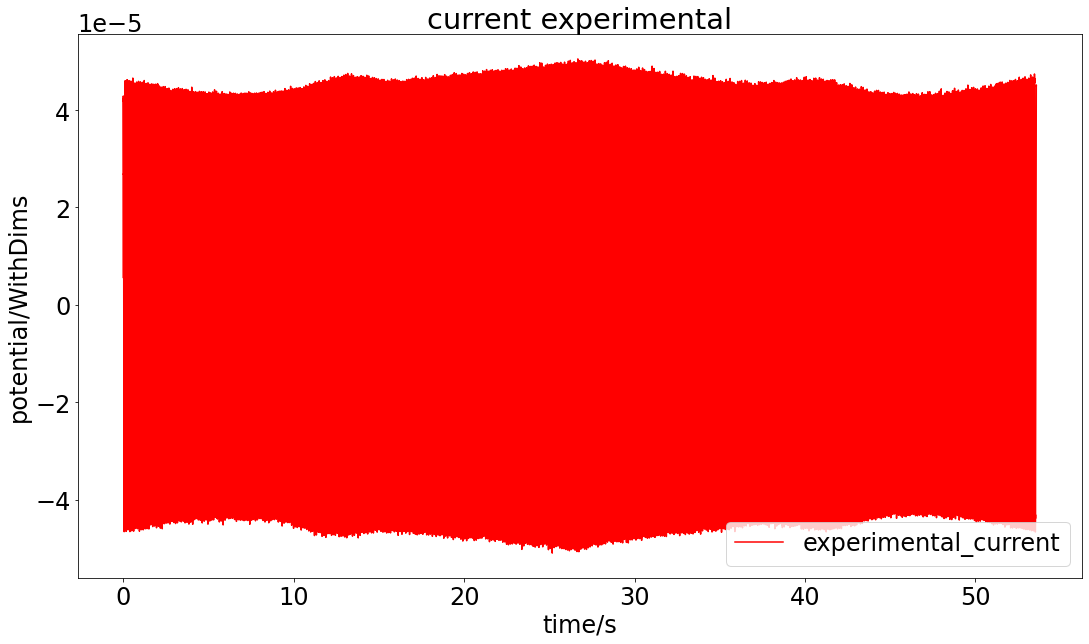

In [150]:
#checks and plot

exp_times = reduced_by_class.time
exp_times = np.asarray(exp_times)
exp_current = reduced_by_class.current
exp_current = np.asarray(exp_current)
measurements = reduced_by_class.shape[0]
print('meausrements in both directions: ', measurements)
measurements = int(measurements/2)
print('meausrements in single direction: ', measurements)

plt.figure(figsize=(18,10))
plt.title("current experimental")
plt.ylabel("potential/WithDims")
plt.xlabel("time/s")
plt.plot(exp_times, exp_current,'r', label='experimental_current')
plt.legend(loc='best')
#plt.yscale("log")
#plt.savefig('ac_current_pints.pdf')
plt.show()

In [151]:
# know paramteres if plotting fourier transform
# know paramteres for 9 150_1_cv_current_reduced_2
startPotential= -50.0E-3
revPotential = -650.0E-3
rateOfPotentialChange = -22.35174e-3

deltaepislon = 150.0E-3
electrode_area = 0.03
electode_coverage = 6.5e-12

In [152]:
# declaring main model for manipulation purposes no symulations are done at this point
model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq)

measurements = exp_current.shape[0]
print('measurements: ', measurements)
if measurements%2 !=0:
    print('*'*30+'\nerror must have evennumber of measurments\n'+'*'*40)

# declaring model to obtain non dimensinalise constant
trial = newtonRaphsonFT(timeStepSize=exp_times[1], inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                        rateOfPotentialChange = rateOfPotentialChange, numberOfMeasurements = measurements, electrode_area=electrode_area, electode_coverage=electode_coverage)

# non-diming experimental data
exp_current_dimless = exp_current/trial.I0

model = wrappedNewton(times = exp_times, inital_current=inital_current, freq=freq, startPotential= startPotential, revPotential = revPotential,
                        rateOfPotentialChange = rateOfPotentialChange, deltaepislon=deltaepislon, electrode_area=electrode_area,
                        electode_coverage=electode_coverage, initaldiscard = 0.035, enddiscard = 0.885)

measurements:  104641
******************************
error must have evennumber of measurments
****************************************


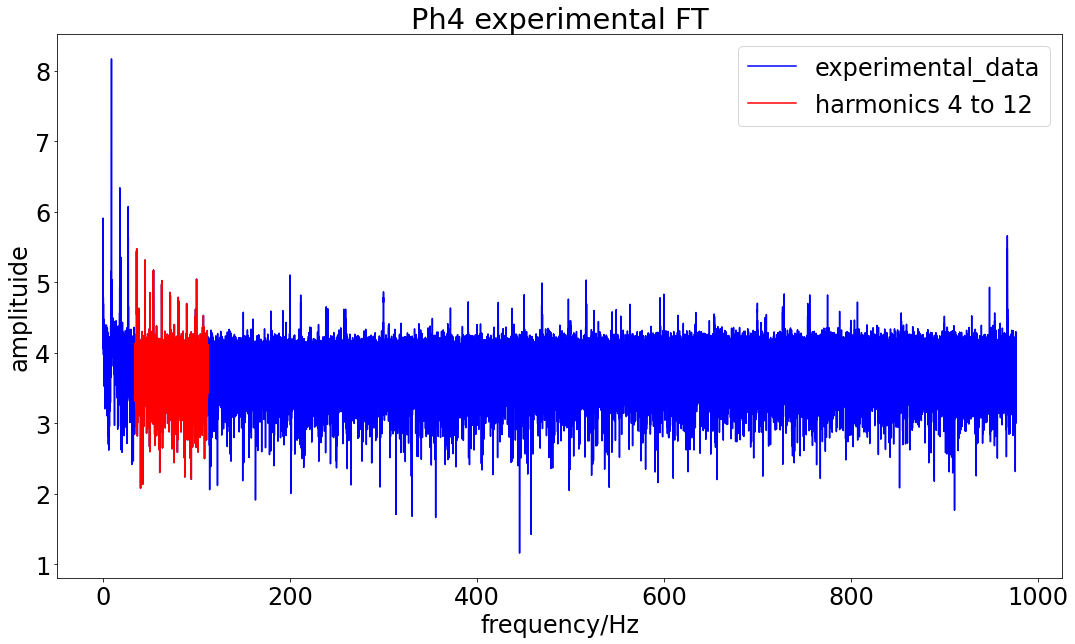

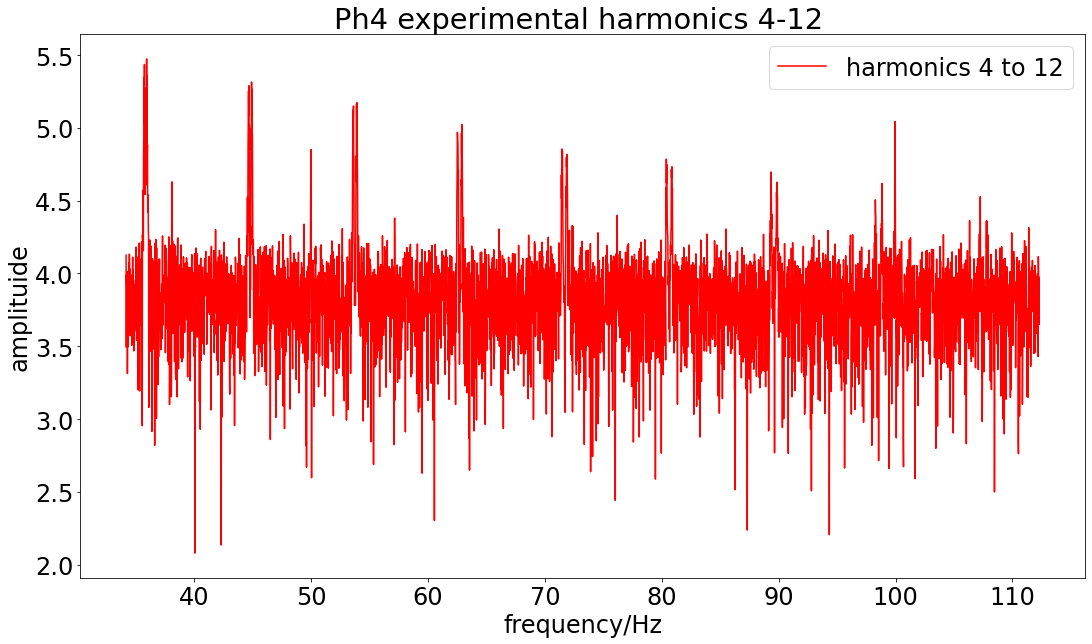

In [153]:
# checking loaction of harmonics 1-4
half_of_measuremnts = int(measurements/2)

# full FT and frequencies
full_sim = np.fft.fft(exp_current_dimless)
half_full_sim = full_sim[:half_of_measuremnts]

freq_org = np.fft.fftfreq(exp_times.shape[-1], d= exp_times[1])
freq_org=freq_org[:half_of_measuremnts]

# regional FT and Frequency

freq = model.frequencies_for_harmonics_4_to_12(exp_times)

harmonics1To4 = model.FT_and_reduce_to_harmonics_4_to_12(exp_current_dimless)

xaxislabel = "frequency/Hz" # "potential/V"
plt.figure(figsize=(18,10))
plt.title("Ph4 experimental FT")
plt.ylabel("amplituide")
plt.xlabel(xaxislabel)
plt.plot(freq_org, np.log10(half_full_sim),'b', label='experimental_data')
plt.plot(freq, np.log10(harmonics1To4),'r', label='harmonics 4 to 12')
plt.legend(loc='best')
plt.show()

xaxislabel = "frequency/Hz" # "potential/V"
plt.figure(figsize=(18,10))
plt.title("Ph4 experimental harmonics 4-12 ")
plt.ylabel("amplituide")
plt.xlabel(xaxislabel)
plt.plot(freq, np.log10(harmonics1To4),'r', label='harmonics 4 to 12')
plt.legend(loc='best')
plt.show()